In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
file_master_power = "./data/master_competitor_market_prices_power.csv"

In [75]:
p = 0.01  # 1% of the lines
# keep the header, then take only 1% of lines
# if random from [0,1] interval is greater than 0.01 the row will be skipped
df = pd.read_csv(
         file_master_power,
         header=0, 
         skiprows=lambda i: i>0 and np.random.rand() > p
)
df.shape

(331484, 23)

In [76]:
type(df)

pandas.core.frame.DataFrame

In [89]:
df["price_per_kwh"] = df.price_year_eur/df.consumption_range_kwh

In [109]:
df = df[(df.price_year_eur < 100_000) & (df.price_per_kwh < 3)].dropna()
df.drop(["Unnamed: 0", "energy", "validity_period"], axis = 1, inplace=True)
df.shape

(330952, 21)

In [110]:
df.head()

,date_valid_to,date_valid_from,post_code,city,consumption_range_kwh,supplier,tariff,rank,price_year_eur,spot_peak,...,y_ahead_peak,2y_ahead_peak,3y_ahead_peak,y_ahead_base,2y_ahead_base,3y_ahead_base,d_ahead_peak,d_ahead_base,strat_index,price_per_kwh
0,2021-10-01,2021-07-24,9130,Chemnitz,8000,Auster,Vivillon,1.0,2173.16,88.579167,...,82.32,73.41,70.33,70.41,62.20,58.15,88.58,88.80,2,0.271645
1,2021-09-23,2021-07-27,12627,Berlin,2000,Ko,Lanturn,1.0,521.60,92.076667,...,84.12,75.29,71.47,72.30,63.88,59.15,92.08,88.50,1,0.260800
2,2021-09-03,2021-07-28,27578,Bremerhaven,4000,Belat,Delibird,3.0,1092.74,88.935000,...,84.58,75.70,71.47,72.84,64.05,59.40,88.94,87.22,3,0.273185
3,2021-09-03,2021-07-28,46238,Bottrop,4000,Pulenat,Patrat,1.0,1137.65,88.935000,...,84.58,75.70,71.47,72.84,64.05,59.40,88.94,87.22,3,0.284413
4,2021-09-03,2021-07-28,51381,Leverkusen,4250,Pulenat,Lileep,2.0,1165.23,88.935000,...,84.58,75.70,71.47,72.84,64.05,59.40,88.94,87.22,3,0.274172


In [111]:
df.columns

Index(['date_valid_to', 'date_valid_from', 'post_code', 'city',
       'consumption_range_kwh', 'supplier', 'tariff', 'rank', 'price_year_eur',
       'spot_peak', 'spot_base', 'y_ahead_peak', '2y_ahead_peak',
       '3y_ahead_peak', 'y_ahead_base', '2y_ahead_base', '3y_ahead_base',
       'd_ahead_peak', 'd_ahead_base', 'strat_index', 'price_per_kwh'],
      dtype='object')

In [102]:
prices = df.iloc[:,10:21]
prices.head()

,price_year_eur,spot_peak,spot_base,y_ahead_peak,2y_ahead_peak,3y_ahead_peak,y_ahead_base,2y_ahead_base,3y_ahead_base,d_ahead_peak,d_ahead_base,strat_index
0,2173.16,88.579167,88.800833,82.32,73.41,70.33,70.41,62.20,58.15,88.58,88.80,2
1,521.60,92.076667,88.502917,84.12,75.29,71.47,72.30,63.88,59.15,92.08,88.50,1
2,1092.74,88.935000,87.223750,84.58,75.70,71.47,72.84,64.05,59.40,88.94,87.22,3
3,1137.65,88.935000,87.223750,84.58,75.70,71.47,72.84,64.05,59.40,88.94,87.22,3
4,1165.23,88.935000,87.223750,84.58,75.70,71.47,72.84,64.05,59.40,88.94,87.22,3


<AxesSubplot: >

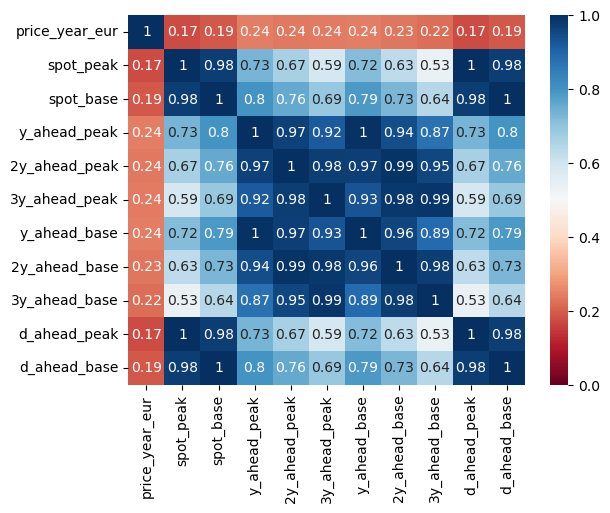

In [23]:
kwargs = {"vmin": 0, "vmax": 1, "annot": True, "cmap": "RdBu"}
sns.heatmap(prices.corr(), **kwargs)

<AxesSubplot: >

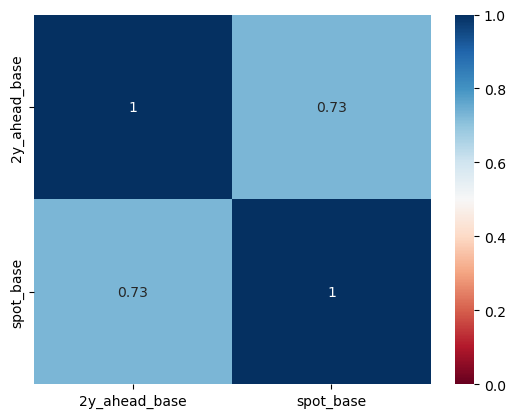

In [56]:
select_prices = prices.loc[:,["2y_ahead_base", "spot_base"]]
sns.heatmap(select_prices.corr(), **kwargs)

In [2]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [52]:
def vif_scores(df):
    VIF_Scores = pd.DataFrame()
    VIF_Scores["Independent Features"] = df.columns
    VIF_Scores["VIF Scores"] = [round(variance_inflation_factor(df.values,i), 2) for i in range(df.shape[1])]
    return VIF_Scores

In [39]:
prices = prices.iloc[:,1:]
prices.head()

,spot_peak,spot_base,y_ahead_peak,2y_ahead_peak,3y_ahead_peak,y_ahead_base,2y_ahead_base,3y_ahead_base,d_ahead_peak,d_ahead_base
0,95.030000,91.423333,84.33,75.62,72.10,72.50,63.73,60.46,95.03,91.42
1,93.410833,89.735833,82.82,74.80,71.92,70.88,63.10,59.67,93.41,89.74
2,88.579167,88.800833,82.32,73.41,70.33,70.41,62.20,58.15,88.58,88.80
3,88.935000,87.223750,84.58,75.70,71.47,72.84,64.05,59.40,88.94,87.22
4,88.935000,87.223750,84.58,75.70,71.47,72.84,64.05,59.40,88.94,87.22


In [53]:
vif_scores(prices)

,Independent Features,VIF Scores
0,spot_peak,7.862711e+09
1,spot_base,7.708799e+09
2,y_ahead_peak,8.518100e+02
3,2y_ahead_peak,8.292000e+02
4,3y_ahead_peak,9.054400e+02
5,y_ahead_base,1.002980e+03
6,2y_ahead_base,1.425610e+03
7,3y_ahead_base,1.432320e+03
8,d_ahead_peak,7.862745e+09
9,d_ahead_base,7.708937e+09


In [54]:
vif_scores(select_prices)

,Independent Features,VIF Scores
0,2y_ahead_base,9.94
1,spot_base,9.94


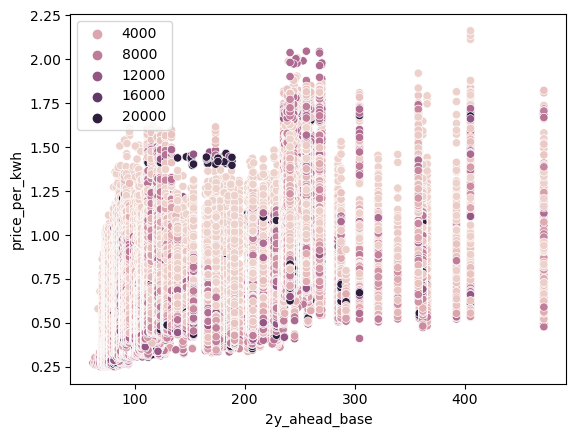

In [99]:
sns.scatterplot(df, x="2y_ahead_base", y="price_per_kwh", hue ="consumption_range_kwh" )
plt.legend(loc = "upper left")

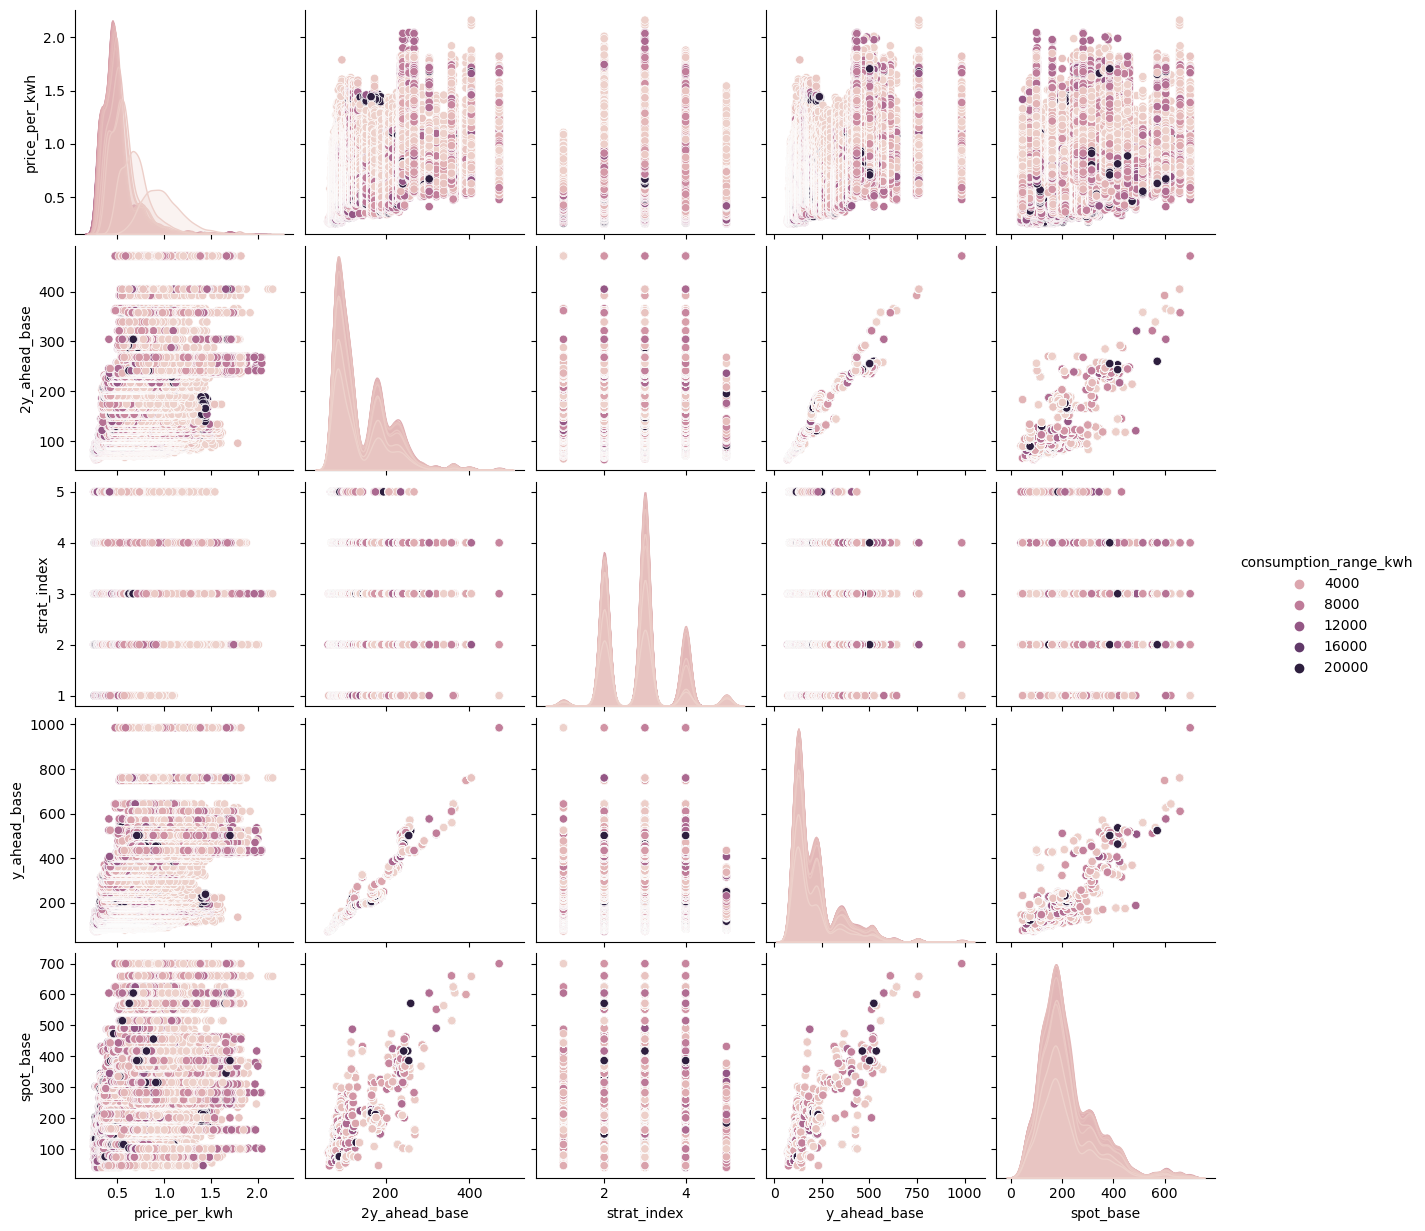

In [120]:
sns.pairplot(df.loc[:,["price_per_kwh","2y_ahead_base", "strat_index", "y_ahead_base", "spot_base", "consumption_range_kwh"]], hue = "consumption_range_kwh")

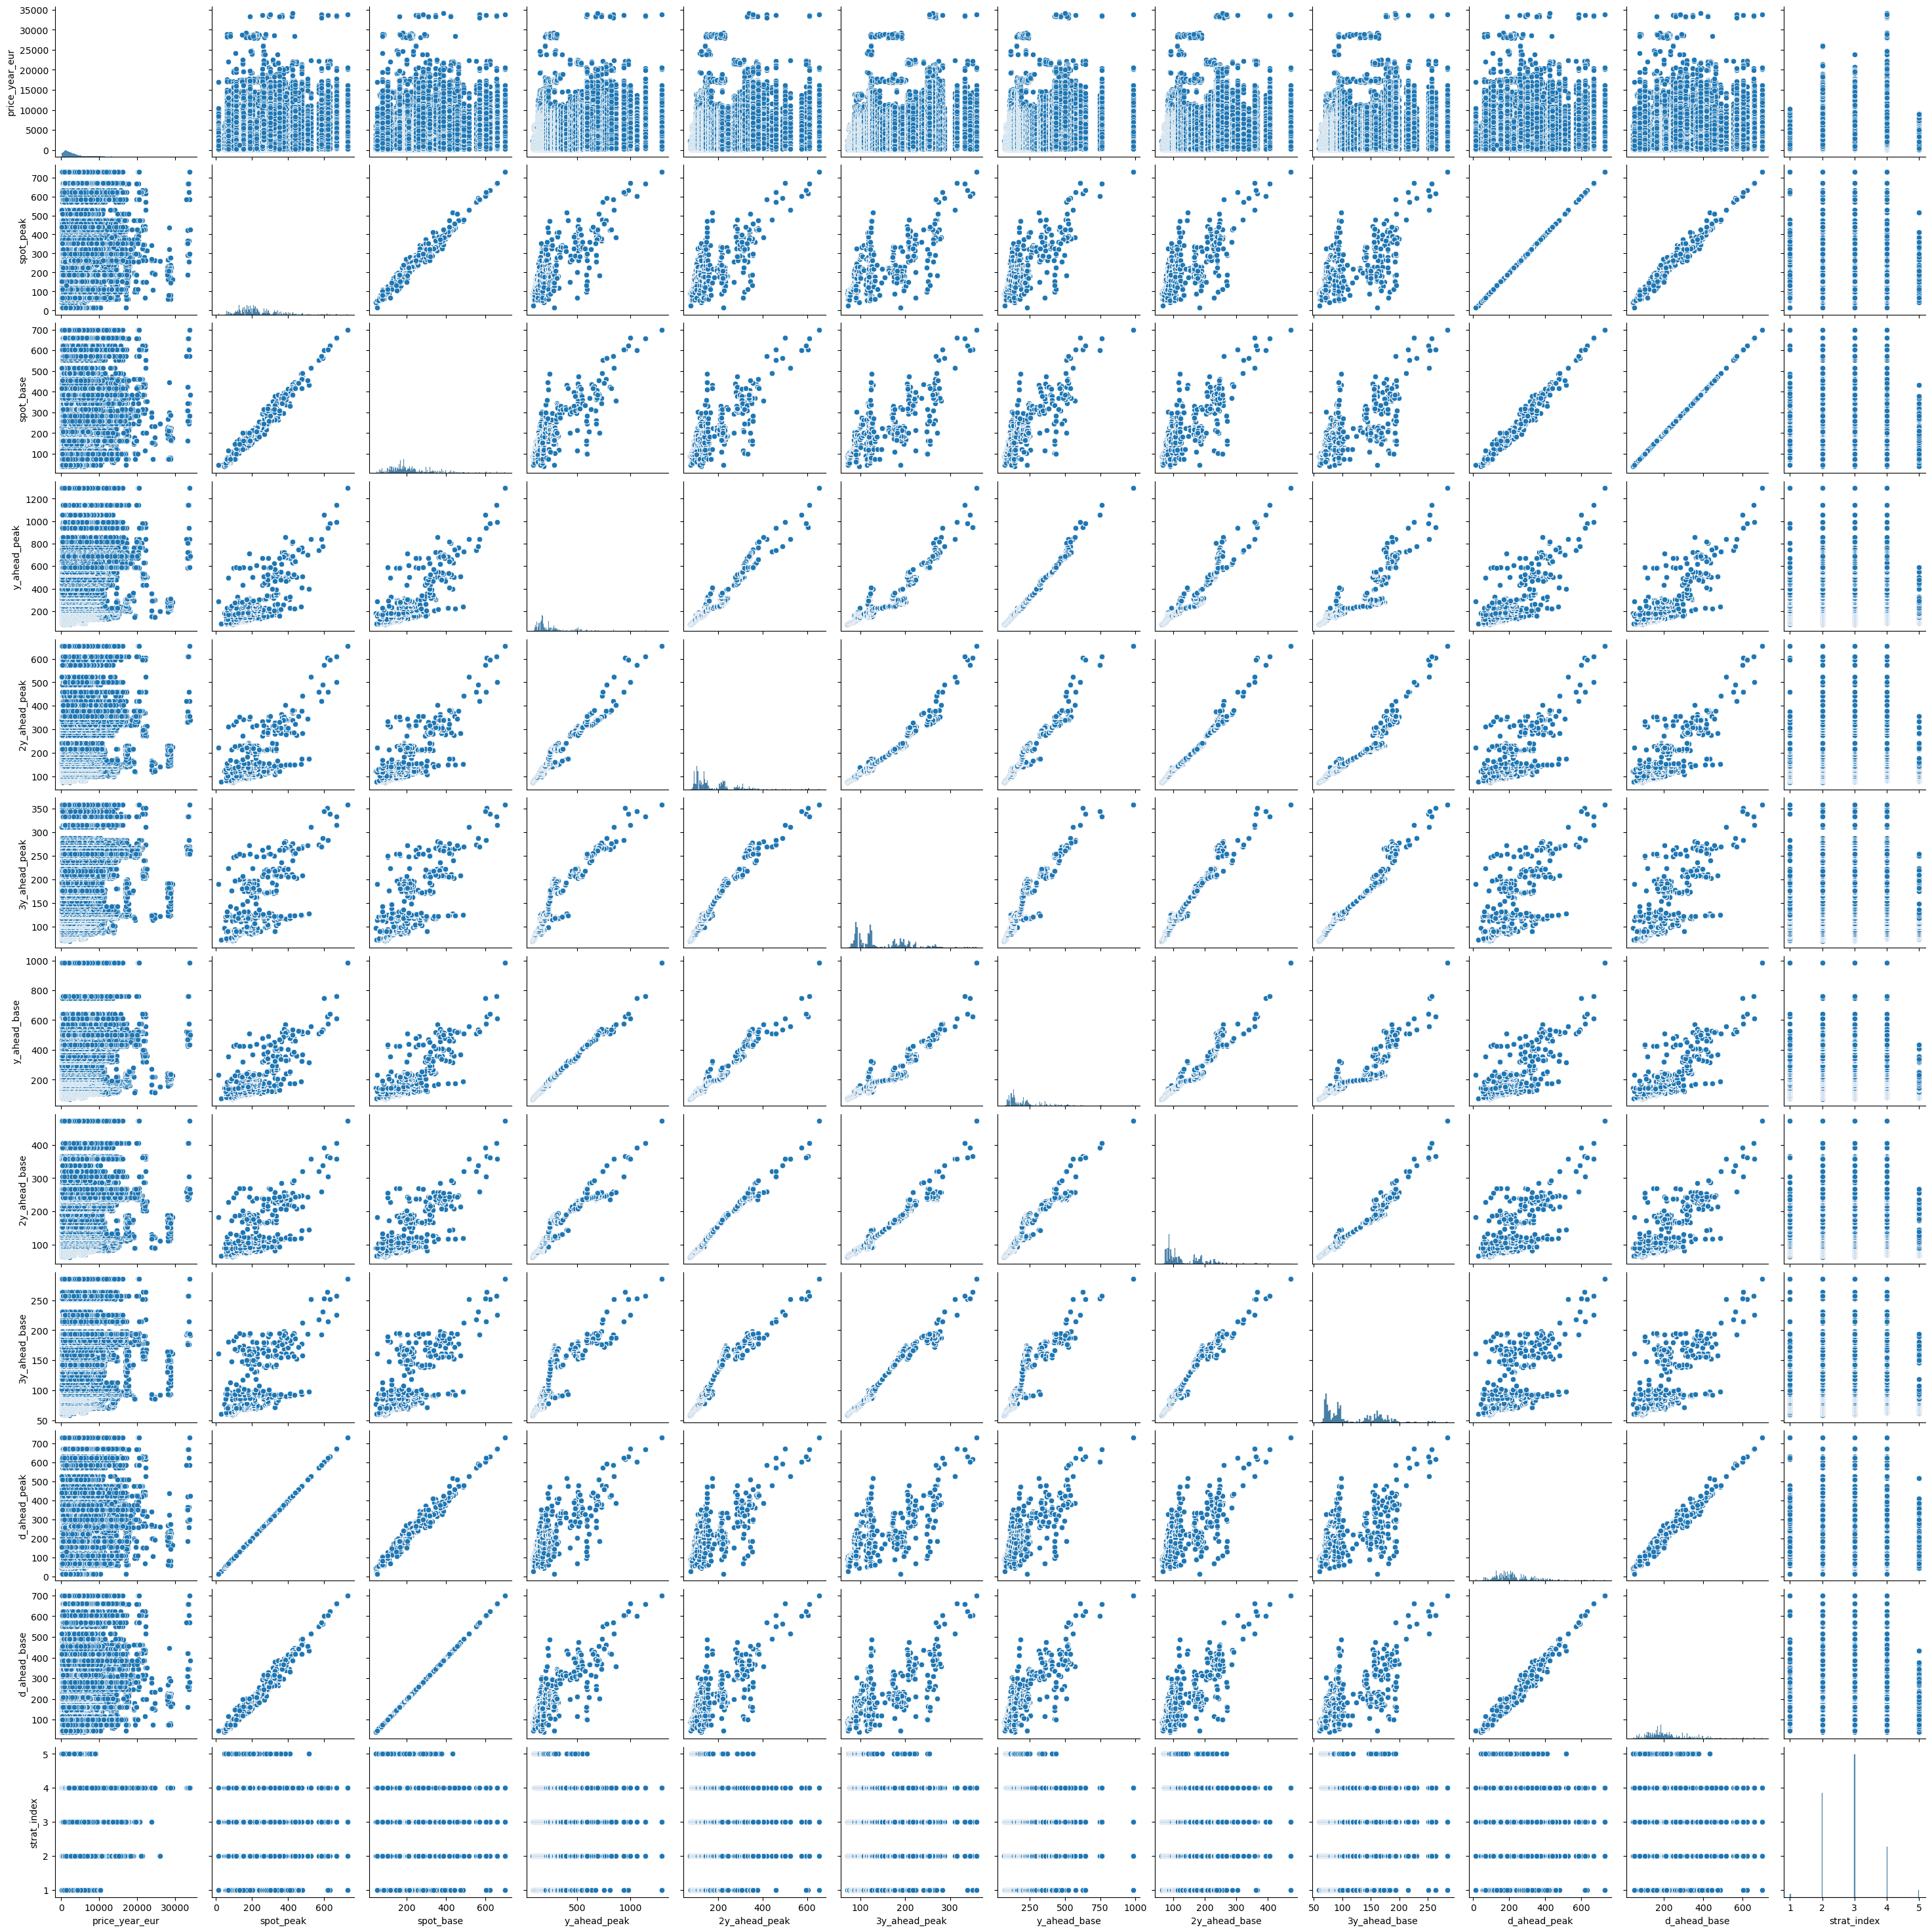

In [122]:
sns.pairplot(prices)